Xử lí dữ liệu đưa các rating về dạng tích cực (0) và tiêu cực (1)

# Import Lib

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("max_colwidth", 200)

# Load dataset

In [26]:
path = "./data/total_comment(13-4-2022).json"
dataset = pd.read_json(path)
dataset.head()

,name,content,rate
0,Nguyễn Giang An,"mua bỉm đợt sale 1tr600k cho 4 bịch bỉm, thì bị chia thành 2 đơn do hết hàng. đợi ship dài cả cổ. nhưng cái chính là lúc thêm vào giỏ hàng thấy được tặng xe bập bênh, nhưng 30 giây sau khi thanh t...",1
1,Ngọc Trâm,"Quá tệ.\n1/ Về giao hàng vs cskh. Mình đồng ý mùa dịch nên giao hàng có thể chậm trễ hơn so với bình thường, nhưng cách chậm trễ và đặc biệt dịch vụ chăm sóc khách hàng quá tệ. Liên hệ phản hồi k ...",1
2,Hương Minh,Hàng chất lượng. Giá rẻ hơn cửa hàng. Nhưng bỉm có mùi \n\nHàng chất lượng. Giá rẻ hơn cửa hàng. Nhưng bỉm có mùi \n\nHàng chất lượng. Giá rẻ hơn cửa hàng. Nhưng bỉm có mùi,5
3,Jany Pham,"Chất lượng bỉm thì ok mà bên giao hàng và bên hỗ trợ từ số hotline quá chậm chễ. Mình đặt 2 bịch cho 2 đứa, 1 size XXL, 1 size L. Đến ngày hẹn giao hàng chờ cả ngày ko thấy. Đến tối muộn có nhân v...",1
4,My Linh,hàng giả mọi người ơi đừng mua . vì cái tã này mỏng hơn cái tã mình mua trực tiếp của bobby luôn. mọi người cẩn thận nhé . 419k không phải ít tiền vì vậy đừng để mua nhầm như mình.,1


# Info dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4667466 entries, 0 to 4667465
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   name     object
 1   content  object
 2   rate     int64 
dtypes: int64(1), object(2)
memory usage: 106.8+ MB


# Vẽ tỉ lệ số bình luận rỗng

In [28]:
def numEmptyContent(df_frame):
    total_empty = len(df_frame[df_frame['content'] == ""])
    total_dataset = len(df_frame)
    print("Total comments: ", total_dataset)
    print("Total empty: ", total_empty)
    #
    return [total_dataset, total_empty]


def func(pct):
    return "{:1.1f}%".format(pct)


Total comments:  4667466
Total empty:  2699971


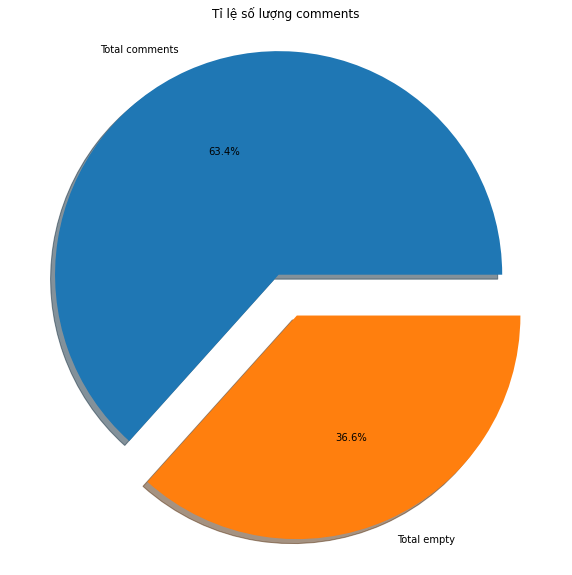

In [29]:
# Get value
numEmptyContentArray = numEmptyContent(dataset)
labels = ['Total comments', 'Total empty']
# Ve
plt.figure(figsize=(10, 10))
plt.pie(numEmptyContentArray, labels=labels,
        autopct=lambda pct: func(pct), explode=[0, 0.2], shadow=True)
plt.title('Tỉ lệ số lượng comments')
plt.axis('equal')
plt.show()


# Loại bỏ comment rỗng

In [30]:
df_not_empty = dataset[dataset["content"] != ""]

In [31]:
numEmptyContent(df_not_empty)

Total comments:  1967495
Total empty:  0


[1967495, 0]

In [37]:
df_not_empty.to_json("./data/comments_not_empty.json")

# Tỉ lệ rating

In [32]:
def numRate(df_frame):
   # get number rate
    rate_1 = len((df_frame[df_frame['rate'] == 1]))
    rate_2 = len((df_frame[df_frame['rate'] == 2]))
    rate_3 = len((df_frame[df_frame['rate'] == 3]))
    rate_4 = len((df_frame[df_frame['rate'] == 4]))
    rate_5 = len((df_frame[df_frame['rate'] == 5]))
    #
    print("Rate 1: ", rate_1)
    print("Rate 2: ", rate_2)
    print("Rate 3: ", rate_3)
    print("Rate 4: ", rate_4)
    print("Rate 5: ", rate_5)
    #
    return [rate_1, rate_2, rate_3, rate_4, rate_5]


Rate 1:  135215
Rate 2:  56267
Rate 3:  115034
Rate 4:  255977
Rate 5:  1405001


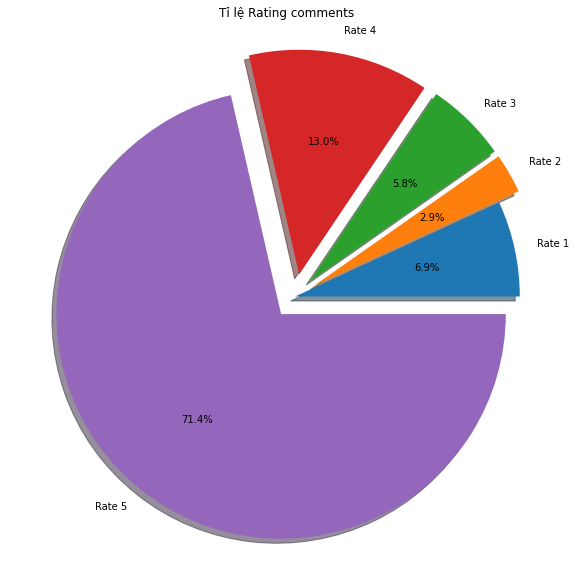

In [33]:
# Get value
numRateArray = numRate(df_not_empty)
labels = ['Rate 1', 'Rate 2', 'Rate 3', 'Rate 4', 'Rate 5']
# Ve
plt.figure(figsize=(10, 10))
plt.pie(numRateArray, labels=labels,
        autopct=lambda pct: func(pct), explode=[0, 0.1,0.1,0.1,0.1], shadow=True)
plt.title('Tỉ lệ Rating comments')
plt.axis('equal')
plt.show()


In [43]:
content_rate3 = df_not_empty[df_not_empty["rate"] == 3].iloc[8]
content_rate3.head()

name                                        Nguyễn Xuân Sương
content    giao hàng quá lâu, không liên lạc để hủy đơn được.
rate                                                        3
Name: 187, dtype: object

# Chuyển đổi rate sang dạng tích cực hoặc tiêu cực
Tích cực = 0, Tiêu cực = 1

In [44]:
df_not_empty["rate"] = np.where(df_not_empty["rate"] <= 3, 1, 0)

C:\Users\OnKhang\AppData\Local\Temp\ipykernel_5484\3836310394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_empty["rate"] = np.where(df_not_empty["rate"] <= 3, 1, 0)


In [56]:
df_not_empty.to_json("./data/binaryComments.json")

# Tỉ lệ giữa bình luận tiêu cực và tích cực

In [53]:
def numRateBinary(df_frame):
   # get number rate
    rate_0 = len((df_frame[df_frame['rate'] == 0]))
    rate_1 = len((df_frame[df_frame['rate'] == 1]))
    #
    print("TÍch cực: ", rate_0)
    print("Tiêu cực: ", rate_1)
    #
    return [rate_0, rate_1]


TÍch cực:  1660978
Tiêu cực:  306517


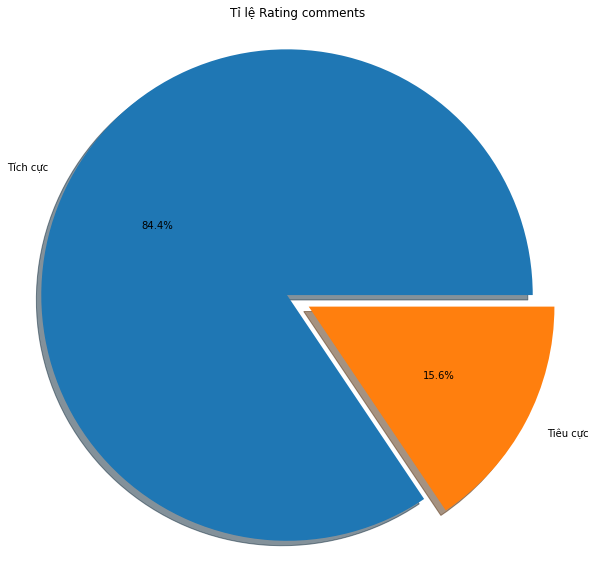

In [55]:
# Get value
numRateArray = numRateBinary(df_not_empty)
labels = ['Tích cực', 'Tiêu cực']
# Ve
plt.figure(figsize=(10, 10))
plt.pie(numRateArray, labels=labels,
        autopct=lambda pct: func(pct), explode=[0, 0.1], shadow=True)
plt.title('Tỉ lệ Rating comments')
plt.axis('equal')
plt.show()
